Testing the impact of daily, weekly, and monthly cost average strategies vs. buy and hold for BTC
This was prompted by a tweet from one of my favorite gambling/NBA personalities @haralabob

Disclaimer: I swear I'm not a big crypto guy, this is just for fun

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

In [112]:
# From 2018-07-10 To 2019-07-10 (downloaded as csv from Yahoo)
df = pd.read_csv('./data/btc_usd.csv')
df.index = pd.to_datetime(df.Date)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2018-07-09,2018-07-09,6668.839844,6683.609863,6277.229980,6306.850098,6306.850098,470432142
2018-07-10,2018-07-10,6306.870117,6405.589844,6293.680176,6394.359863,6394.359863,327667754
2018-07-11,2018-07-11,6394.359863,6394.930176,6084.000000,6253.600098,6253.600098,409078182
2018-07-12,2018-07-12,6253.660156,6349.209961,6131.540039,6229.830078,6229.830078,319802271
2018-07-13,2018-07-13,6229.609863,6332.459961,6190.180176,6268.750000,6268.750000,174416786


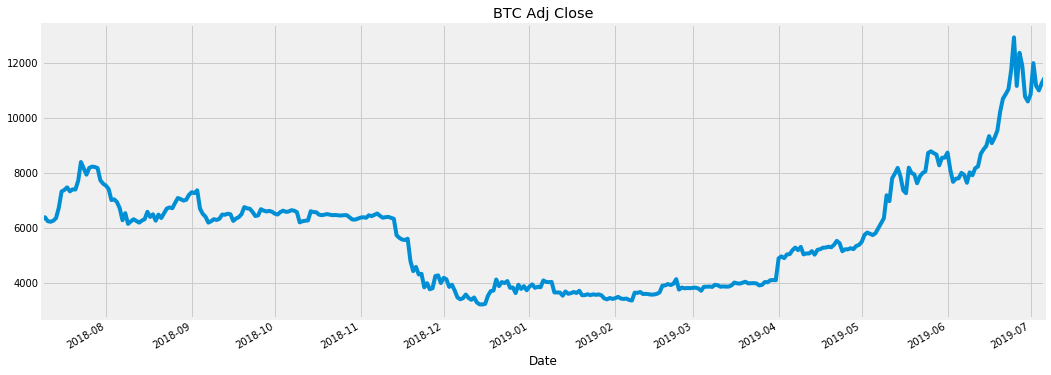

In [113]:
df['Adj Close'].plot(figsize=(16,6), title='BTC Adj Close')

In [114]:
df['Returns'] = df['Close'].pct_change(1)
df['Cumulative Returns'] = (1 + df['Returns']).cumprod()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Cumulative Returns
Date,,,,,,,,,
2018-07-09,2018-07-09,6668.839844,6683.609863,6277.229980,6306.850098,6306.850098,470432142,NaN,NaN
2018-07-10,2018-07-10,6306.870117,6405.589844,6293.680176,6394.359863,6394.359863,327667754,0.013875,1.013875
2018-07-11,2018-07-11,6394.359863,6394.930176,6084.000000,6253.600098,6253.600098,409078182,-0.022013,0.991557
2018-07-12,2018-07-12,6253.660156,6349.209961,6131.540039,6229.830078,6229.830078,319802271,-0.003801,0.987788
2018-07-13,2018-07-13,6229.609863,6332.459961,6190.180176,6268.750000,6268.750000,174416786,0.006247,0.993959


In [115]:
# Helpers


# I'm sure there is a more panda-centric vectorized approach to this
# but given the small data set, I'm settling for a simple loop
def dollar_cost_average(df, invest_amount, interval=1):
    portfolio_values = [invest_amount]
    day_index = 0
       
    for index, row in df.iterrows():
        daily_change = (1+row.Returns)
        daily_close_value = daily_change*invest_amount
        
        if day_index == 1:
            portfolio_values.append(daily_close_value)
        
        elif day_index > 1:
            if day_index % interval == 0:
                portfolio_value = (portfolio_values[day_index-1]*daily_change) + daily_close_value
                portfolio_values.append(portfolio_value)
            else:
                portfolio_values.append(portfolio_values[day_index-1]*daily_change)

        day_index += 1
    
    return portfolio_values    

### Assumptions
1. Daily investments of $10

2. Weekly investments of $70

3. Monthly investments of $304

4. Single investment of $3650 on 2018-07-10

In [116]:
# 1
df['Daily Cost Average'] = dollar_cost_average(df, 10)

In [117]:
# 2
df['Weekly Cost Average'] = dollar_cost_average(df, 50, 7)

In [118]:
# 3
df['Monthly Cost Average'] = dollar_cost_average(df, 304, 30)

In [119]:
# 4 Lump Sum
ending_value = 3560 * df['Cumulative Returns'][-1]
print(ending_value.round(2))

df['Lump Sum'] = dollar_cost_average(df, 3650, 365)

6462.12


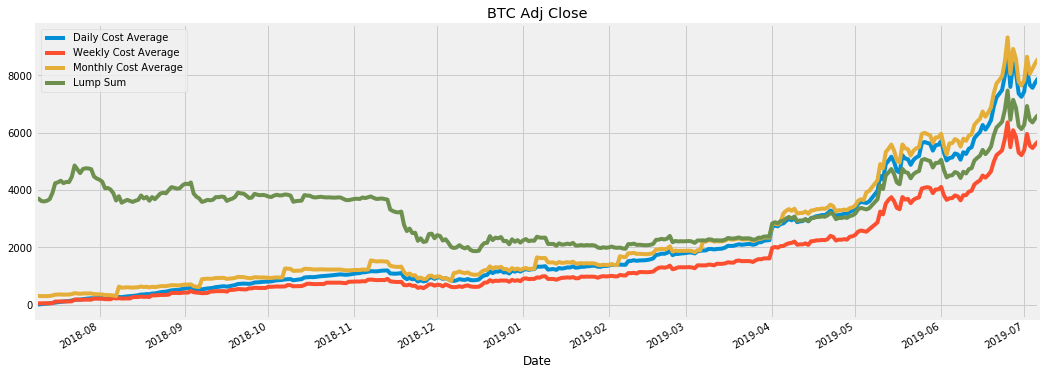

In [122]:
df[['Daily Cost Average', 'Weekly Cost Average', 'Monthly Cost Average', 'Lump Sum']].plot(figsize=(16,6), title='BTC Adj Close')